### Hands on Machine Learnig Exercise
Leonardo de Marqui Marques.

2018-04-03

Housing price prediction



###### Introduction
This notebook aims to give a basic introduction in a machine learnig analysis to predict the price of housing.


###### Import
The first step is to import all the libraries, data, scripts and everithing you will need.

In [1]:
# -- Libraries -- #
import  sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# -- data -- #
file_directory = "/Users/leo/Documents/Estudos/ebooks/Hands-On_Machine_Learning_with_schi_kit_learn_and_tensor_flow/handson-ml-master/datasets/housing/"
housing = pd.read_csv(file_directory + "housing.csv")


###### Data Overview.

In this step we want to take an overview in the dataset in order to acquire some knowledge about the problem. It is important to check what kind of information you are dealing with and if it matches your expectations regarding the type of the data each column has.

In [2]:
# Types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Not all columns have the data type we expected. Columns like total_bedrooms and could be of type integer, but for our purposes this is not a problem. What is a problem is the fact that this column has some missing data. All other columns have 20640 rows (instances) wereas total_bedrooms has 20433. The column ocean proximity should be a string. This os also something we will need to take care later.

In [3]:
# summary
housing.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [4]:
pd.DataFrame(housing["ocean_proximity"].value_counts())

,ocean_proximity
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


#### Exploratory Analysis.
A quick exploratory analysis helps us lear about the individual dostribution of each column.

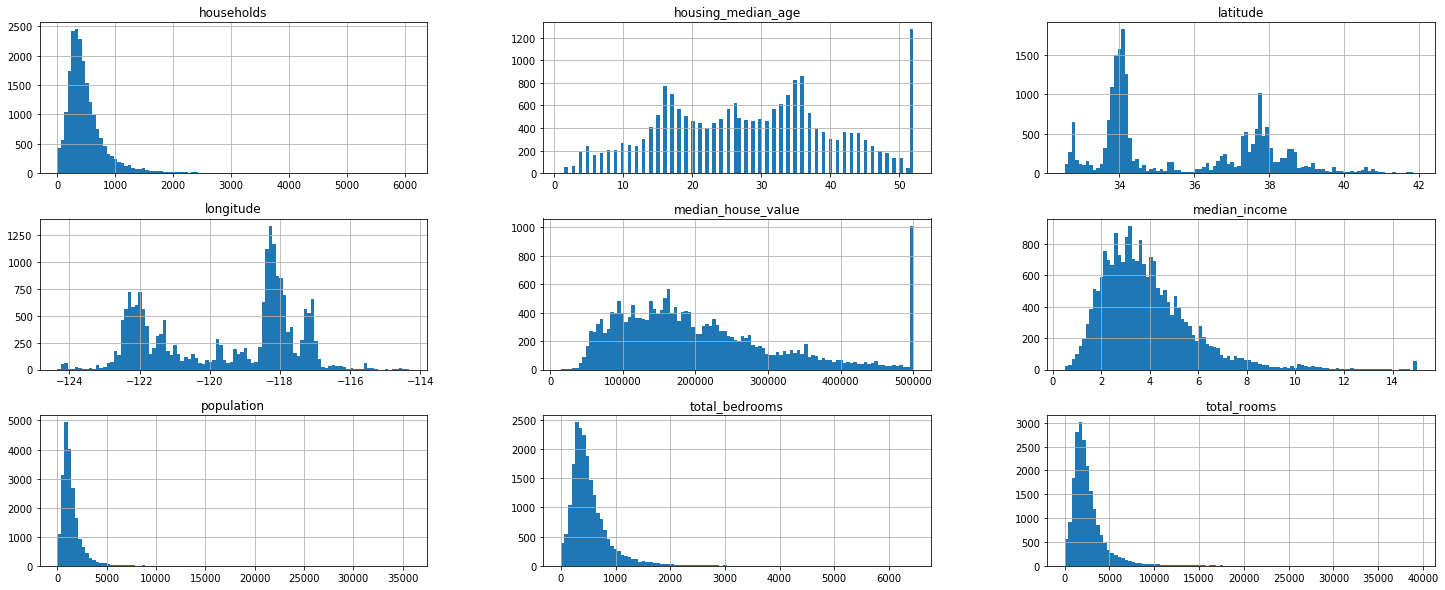

In [5]:
housing.hist(bins=100, figsize=(25,10))
plt.show() # this line make the output less verbose.

Columns households, median_income, population, total_bedrooms and total_rooms are highly assimetrical. 
housing_median_age and median_house_value have a concentration of observation in the higher values. This is because the values higher than the limmit shown in the dataset were gruped. Usually it is not a good idea to do it.

Now that we have some understanding of the data we can get started with the next step.

###### Train & Test sets.
In a precdictive analysis, like this one, the goal is to use the data to fit a model to estimate the target variable when presented with new unknown data. If the model has a good generalization performance on new data we can validate it as a good model. The most intuitive way to validate a model is to collect more data and test our predictions in it. this precess can be expensive or not practical (sometimes not even possible.) A common aproach is to separate part of the data set (test set) to simulate this new unknown data. It is a reliable strategy, but it has an assumption: the new data will come from the same distribution the old data came from. In ther words, if your sample data does not cover a good range of the population the model will have poor generalization performance in new data. Imagine collecting data only from houses near the ocean, would a model fit with this data have a good generalization performance for houses far from the ocean? Probably not. Because of this, it is important to spend time planning a good sampling method. This step of data analysis is usually neglected by data scientists.

In our case we assume the sampling was properly done and we will use the Train/Test aproach.

In [6]:
# separate 20% of the data for testing.

index = np.random.permutation(housing.shape[0])
housing = housing.iloc[index,] # shuffle the data.

test_size = int(housing.shape[0]*0.2)

housing_test = housing.head(test_size)
housing_train = housing.tail(len(index)-test_size)

Once we have split de data set it's best to forget about the test set, otherwise it might influence our thinking and skew our analysis to fit the test set instead of search for usefull patterns in the data. We want the predict new data, not the test set only.

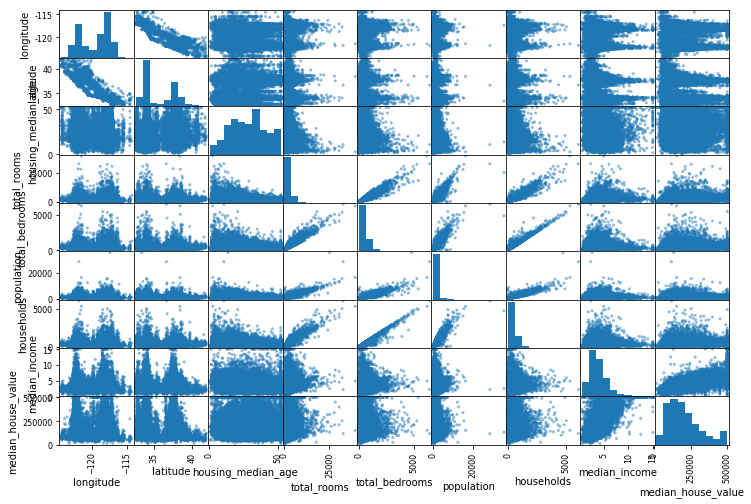

In [7]:
pd.plotting.scatter_matrix(housing_train, figsize =(12,8))
plt.show()

In [24]:
#housing['lat_long'] = housing['latitude']*housing['longitude']
aux = housing.transform(lambda x: x['latitude']*x['longitude'])

KeyError: ('latitude', 'occurred at index longitude')

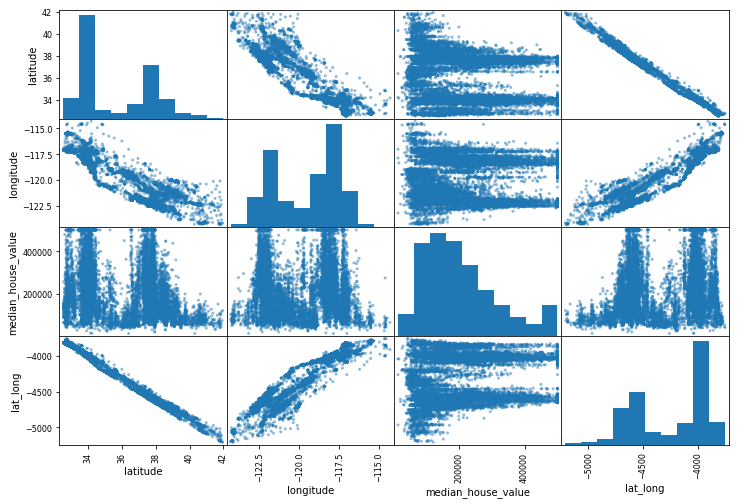

In [21]:
pd.plotting.scatter_matrix(housing_train[['latitude'
                                          , 'longitude'
                                          , 'median_house_value'
                                          , 'lat_long']]
                           , figsize =(12,8))
plt.show()

TypeError: You must first set_array for mappable

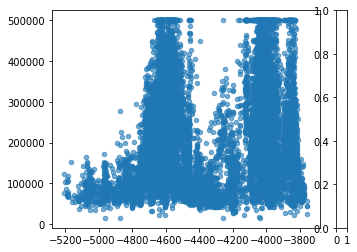

In [ ]:
finnal_da.plot(kind='scatter',
               x='longitude',
               y='latitude',
               c='border',
               cmap=plt.get_cmap("jet"),
               alpha=0.6
               )



